In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2021/SampleSubmissionWiDS2021.csv
/kaggle/input/widsdatathon2021/SolutionTemplateWiDS2021.csv
/kaggle/input/widsdatathon2021/DataDictionaryWiDS2021.csv
/kaggle/input/widsdatathon2021/UnlabeledWiDS2021.csv
/kaggle/input/widsdatathon2021/TrainingWiDS2021.csv


# Load dataset

In [2]:
diabetes = pd.read_csv('../input/widsdatathon2021/TrainingWiDS2021.csv', index_col=0, header = 0)    

diabetes['ethnicity'] = np.where(diabetes['ethnicity'] == "African American", 1, np.where(diabetes['ethnicity'] == "Asian", 2, np.where(diabetes['ethnicity'] == "Caucasian", 3, 
                                np.where(diabetes['ethnicity'] == "Hispanic", 4, np.where(diabetes['ethnicity'] == "Native American", 5, np.where(diabetes['ethnicity'] == "Other/Unknown", 6, np.nan))))))
# The dataset contains 13057 data points with missing values and 181 features(floats(157), integers(15) and object(7))
print(diabetes.columns)  


Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=180)


In [3]:
diabetes = diabetes.drop(["h1_bilirubin_max", "h1_bilirubin_min", "h1_albumin_max", "h1_albumin_min", "h1_lactate_max", "h1_lactate_min", "h1_pao2fio2ratio_max", 
                            "h1_pao2fio2ratio_min", "h1_arterial_ph_max", "h1_arterial_pco2_max", "h1_arterial_pco2_min", "h1_arterial_po2_max", "h1_arterial_po2_min", 
                            "h1_hco3_max", "h1_hco3_min", "h1_wbc_max", "h1_wbc_min", "h1_calcium_max", "h1_calcium_min", "h1_platelets_max", "h1_platelets_min", 
                            "h1_bun_max", "h1_bun_min", "h1_diasbp_invasive_max", "h1_diasbp_invasive_min", "h1_sysbp_invasive_max", "h1_sysbp_invasive_min",
                           "h1_creatinine_max", "h1_creatinine_min", "h1_mbp_invasive_max", "h1_mbp_invasive_min", "h1_arterial_ph_min"], axis = 1)
print(diabetes.columns)

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=148)


# Data Pre-processing:

In [4]:
# Subset only the numerical data
diabetes = diabetes.select_dtypes(np.number)
diabetes.info()

# Remove data with id names
diabetes = diabetes.drop(['encounter_id', 'hospital_id', 'icu_id'], axis = 1)

# Convert any values into float, easy to use for predictive models
diabetes = diabetes.apply (pd.to_numeric, errors='coerce')
diabetes = diabetes.astype(float)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 130157 entries, 1 to 130157
Columns: 143 entries, encounter_id to diabetes_mellitus
dtypes: float64(126), int64(17)
memory usage: 143.0 MB


In [5]:
print(diabetes.dtypes)

age                            float64
bmi                            float64
elective_surgery               float64
ethnicity                      float64
height                         float64
                                ...   
immunosuppression              float64
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
diabetes_mellitus              float64
Length: 140, dtype: object


In [6]:
diabetes.head()

,age,bmi,elective_surgery,ethnicity,height,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,...,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,68.0,22.732803,0.0,3.0,180.3,0.541667,0.0,73.9,2.3,113.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,77.0,27.421875,0.0,3.0,160.0,0.927778,0.0,70.2,NaN,108.0,...,54.8,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25.0,31.952749,0.0,3.0,172.7,0.000694,0.0,95.3,NaN,122.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,81.0,22.635548,1.0,3.0,165.1,0.000694,0.0,61.7,NaN,203.0,...,342.5,236.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,19.0,NaN,0.0,3.0,188.0,0.073611,0.0,NaN,NaN,119.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(diabetes.describe())

                 age            bmi  elective_surgery      ethnicity  \
count  125169.000000  125667.000000     130157.000000  128570.000000   
mean       61.995103      29.110260          0.189840       2.966104   
std        16.822880       8.262776          0.392176       0.977117   
min         0.000000      14.844926          0.000000       1.000000   
25%        52.000000      23.598006          0.000000       3.000000   
50%        64.000000      27.564749          0.000000       3.000000   
75%        75.000000      32.803127          0.000000       3.000000   
max        89.000000      67.814990          1.000000       6.000000   

              height  pre_icu_los_days  readmission_status         weight  \
count  128080.000000     130157.000000            130157.0  126694.000000   
mean      169.607219          0.839933                 0.0      83.791104   
std        10.833085          2.485337                 0.0      24.963063   
min       137.200000         -0.250000     

In [8]:
print("dimension of diabetes data: {}".format(diabetes.shape))
# The diabetes data consists of 130157 data points and 171 features

dimension of diabetes data: (130157, 140)


In [9]:
## Diabetes_mellitus is the feature we are going to predict, 0 means No diabetes and 1 means diabetes. 
print(diabetes.groupby('diabetes_mellitus').size())
# Of the 130157 data points, 102006 have diabetes and 28151 do not have diabetes.

diabetes_mellitus
0.0    102006
1.0     28151
dtype: int64


# Feature engineering and selection

In [10]:
print(diabetes.isnull().sum())

# fill missing values with mean column values (NA replaced with mean values)
diabetes.fillna(diabetes.mean(), inplace=True)
# count the number of NaN values in each column
print(diabetes.isnull().sum())
diabetes

age                            4988
bmi                            4490
elective_surgery                  0
ethnicity                      1587
height                         2077
                               ... 
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
Length: 140, dtype: int64
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
height                         0
                              ..
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
diabetes_mellitus              0
Length: 140, dtype: int64


,age,bmi,elective_surgery,ethnicity,height,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,...,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,68.0,22.732803,0.0,3.0,180.3,0.541667,0.0,73.900000,2.300000,113.0,...,287.600071,224.005403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,77.0,27.421875,0.0,3.0,160.0,0.927778,0.0,70.200000,2.886149,108.0,...,54.800000,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25.0,31.952749,0.0,3.0,172.7,0.000694,0.0,95.300000,2.886149,122.0,...,287.600071,224.005403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,81.0,22.635548,1.0,3.0,165.1,0.000694,0.0,61.700000,2.886149,203.0,...,342.500000,236.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,19.0,29.110260,0.0,3.0,188.0,0.073611,0.0,83.791104,2.886149,119.0,...,287.600071,224.005403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130153,50.0,29.287256,0.0,3.0,175.3,0.023611,0.0,90.000000,2.886149,110.0,...,287.600071,224.005403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130154,79.0,29.653433,0.0,3.0,162.6,0.009722,0.0,78.400000,3.500000,105.0,...,287.600071,224.005403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130155,73.0,32.265371,0.0,1.0,177.8,0.143056,0.0,102.000000,2.886149,114.0,...,163.000000,80.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
130156,81.0,24.408579,0.0,3.0,185.4,0.188194,0.0,83.900000,2.886149,124.0,...,287.600071,224.005403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

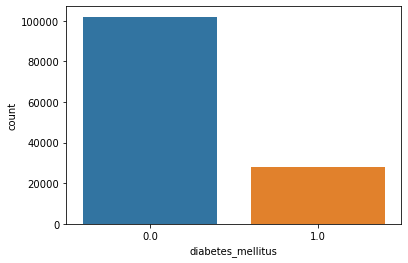

In [11]:
import seaborn as sns
sns.countplot(diabetes['diabetes_mellitus'],label="Count")

# K-Nearest Neighbors to Predict Diabetes

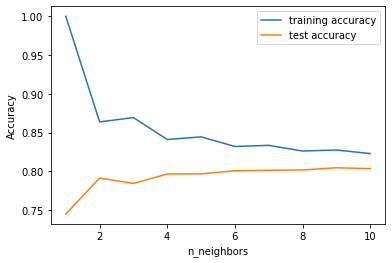

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'diabetes_mellitus'], diabetes['diabetes_mellitus'], stratify=diabetes['diabetes_mellitus'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [13]:
# check the accuracy score of the k-nearest neighbors algorithm to predict diabetes
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.80


# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.745


In [15]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.810
Accuracy on test set: 0.811


# Feature Importance in Decision Trees

In [16]:
# Feature importance shows how important each feature is for the decision a decision tree classifier makes
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.05005538 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.03490805 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0135576  0.         0.90147896 0.         0.         0.
 0.         0.         0.         0

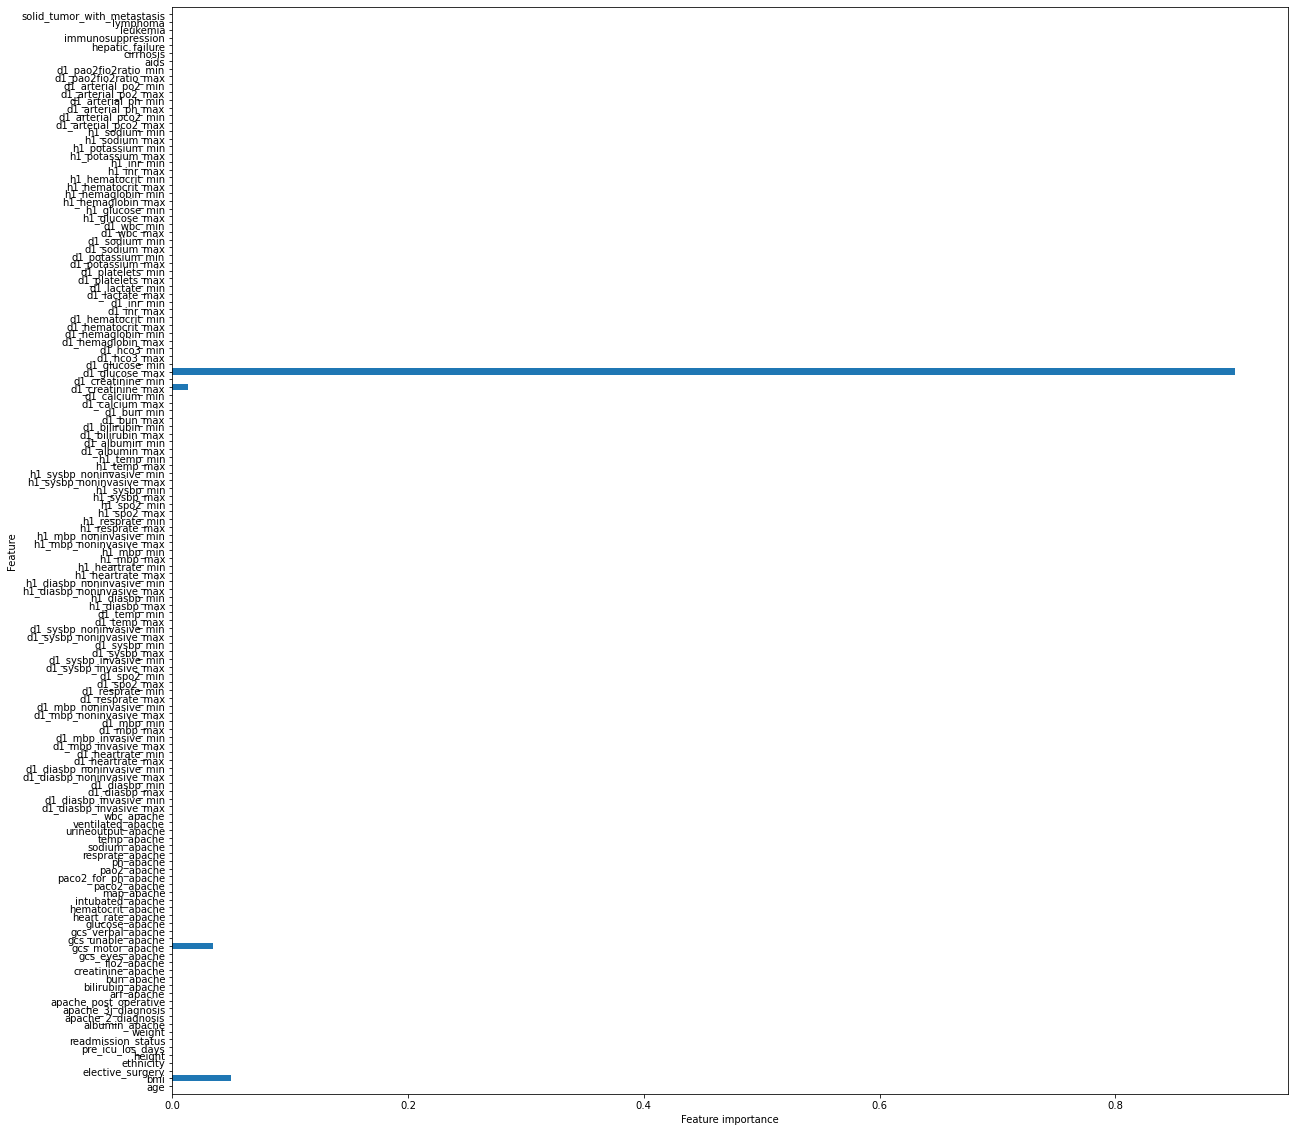

In [17]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=139]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(20,20))
    n_features = 139
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
# The main features (d1_hemoglobin_max, d1_glucose_max, d1_diabsp_noninvasive_min, weight, bmi) seems to be the major features contributing to predict the diabetes

# Deep Learning to Predict Diabetes

In [18]:
# Multilayer perceptrons (MLP) 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))
# The result is not as better than decision tree model, might be due to scaling

Accuracy on training set: 0.82
Accuracy on test set: 0.82


In [19]:
# Re-scale data (Mean of 0 and variance of 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
# The training model is over-fitting on re-scaling

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on training set: 0.882
Accuracy on test set: 0.799


In [20]:
# Tried to increase the iteration, alpha parameter to the weight of the model
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
# Still the training model is over-fitting

Accuracy on training set: 0.826
Accuracy on test set: 0.824


In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


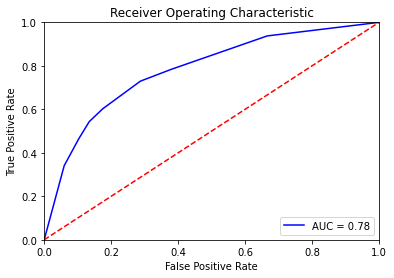

In [22]:
# method I: plt the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Predicitng the unlabelledWiDS2021 dataset

In [23]:
diabetes_unlabelled = pd.read_csv('../input/widsdatathon2021/UnlabeledWiDS2021.csv', index_col=0, header = 0)    

diabetes_unlabelled['ethnicity'] = np.where(diabetes_unlabelled['ethnicity'] == "African American", 1, np.where(diabetes_unlabelled['ethnicity'] == "Asian", 2, np.where(diabetes_unlabelled['ethnicity'] == "Caucasian", 3, 
                                np.where(diabetes_unlabelled['ethnicity'] == "Hispanic", 4, np.where(diabetes_unlabelled['ethnicity'] == "Native American", 5, np.where(diabetes_unlabelled['ethnicity'] == "Other/Unknown", 6, np.nan))))))
diabetes_encounter = diabetes_unlabelled[["encounter_id"]]

In [24]:
diabetes_unlabelled = diabetes_unlabelled.drop(["h1_bilirubin_max", "h1_bilirubin_min", "h1_albumin_max", "h1_albumin_min", "h1_lactate_max", "h1_lactate_min", "h1_pao2fio2ratio_max", 
                            "h1_pao2fio2ratio_min", "h1_arterial_ph_max", "h1_arterial_pco2_max", "h1_arterial_pco2_min", "h1_arterial_po2_max", "h1_arterial_po2_min", 
                            "h1_hco3_max", "h1_hco3_min", "h1_wbc_max", "h1_wbc_min", "h1_calcium_max", "h1_calcium_min", "h1_platelets_max", "h1_platelets_min", 
                            "h1_bun_max", "h1_bun_min", "h1_diasbp_invasive_max", "h1_diasbp_invasive_min", "h1_sysbp_invasive_max", "h1_sysbp_invasive_min",
                           "h1_creatinine_max", "h1_creatinine_min", "h1_mbp_invasive_max", "h1_mbp_invasive_min", "h1_arterial_ph_min"], axis = 1)
print(diabetes_unlabelled.columns)

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min',
       'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis'],
      dtype='object', length=147)


# Data Pre-processing:

In [25]:
# Subset only the numerical data
diabetes_unlabelled = diabetes_unlabelled.select_dtypes(np.number)
diabetes_unlabelled.head()

# Remove data with id names
diabetes_unlabelled = diabetes_unlabelled.drop(['encounter_id', 'hospital_id', 'icu_id'], axis = 1)

# Convert any values into float, easy to use for predictive models
diabetes_unlabelled = diabetes_unlabelled.apply (pd.to_numeric, errors='coerce')
diabetes_unlabelled = diabetes_unlabelled.astype(float)


In [26]:
print("dimension of diabetes_unlabelled data: {}".format(diabetes_unlabelled.shape))
# The diabetes data consists of 10234 data points and 139 features

dimension of diabetes_unlabelled data: (10234, 139)


In [27]:
print(diabetes_unlabelled.isnull().sum())

# fill missing values with mean column values (NA replaced with mean values)
diabetes_unlabelled.fillna(diabetes_unlabelled.mean(), inplace=True)
# count the number of NaN values in each column
print(diabetes_unlabelled.isnull().sum())
diabetes_unlabelled

age                               0
bmi                            1015
elective_surgery                  0
ethnicity                       204
height                          301
                               ... 
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
Length: 139, dtype: int64
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
height                         0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 139, dtype: int64


,age,bmi,elective_surgery,ethnicity,height,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,...,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,72.0,29.116463,0.0,3.0,152.4,0.015278,0.0,83.478729,2.800000,110.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86.0,29.116463,0.0,3.0,175.3,0.000000,0.0,83.478729,2.865877,117.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,72.0,29.116463,0.0,3.0,162.6,0.003472,0.0,83.478729,3.200000,302.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66.0,29.116463,0.0,3.0,177.8,0.884028,0.0,83.478729,2.865877,113.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,89.0,29.116463,0.0,3.0,170.2,0.013194,0.0,83.478729,3.400000,117.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,36.0,37.500000,0.0,3.0,170.1,1.696528,0.0,108.600000,2.865877,305.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10231,61.0,32.100000,0.0,3.0,160.0,0.033333,0.0,82.300000,2.865877,124.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10232,74.0,22.700000,0.0,3.0,165.1,0.757639,0.0,62.000000,2.865877,113.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10233,90.0,19.900000,0.0,3.0,160.0,0.087500,0.0,50.900000,2.865877,108.0,...,103.107914,297.79934,224.415951,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = tree.predict_proba(diabetes_unlabelled)
preds = probs[:,1]

In [29]:
diabetes_prediction = pd.DataFrame({'diabetes_mellitus': probs[:, 0]})
diabetes_prediction.head()

,diabetes_mellitus
0,0.952261
1,0.952261
2,0.871007
3,0.867394
4,0.871007


In [30]:
diabetes_prediction_final = pd.concat([diabetes_encounter.reset_index(drop=True), diabetes_prediction], axis=1)
diabetes_prediction_final

,encounter_id,diabetes_mellitus
0,144740,0.952261
1,141990,0.952261
2,142038,0.871007
3,138628,0.867394
4,141682,0.871007
...,...,...
10229,143750,0.867394
10230,143813,0.952261
10231,137126,0.871007
10232,135652,0.952261


In [31]:
diabetes_prediction_final.to_csv('Diabetes_prediction.csv',index=False)